# Data centric
CHEMIN Bastien  
GUITON Clément

In [3]:
import pandas as pd

## Importation des données

In [4]:
olist_customers = pd.read_csv('datas/olist_customers_dataset.csv')
olist_geolocation = pd.read_csv('datas/olist_geolocation_dataset.csv')
olist_order_items = pd.read_csv('datas/olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv('datas/olist_order_payments_dataset.csv')
olist_order_reviews = pd.read_csv('datas/olist_order_reviews_dataset.csv')
olist_orders = pd.read_csv('datas/olist_orders_dataset.csv')
olist_products = pd.read_csv('datas/olist_products_dataset.csv')
olist_sellers = pd.read_csv('datas/olist_sellers_dataset.csv')
olist_category_name_translation = pd.read_csv('datas/product_category_name_translation.csv')

## Extraction des données

### Structure des données


#### Customer
- **Customer ID:** [customer_id]
- **Customer Unique ID:** [customer_unique_id]
- **Zip Code Prefix:** [customer_zip_code_prefix]
- **City:** [customer_city]
- **State:** [customer_state]

##### Geolocation
- **Zip Code Prefix:** [geolocation_zip_code_prefix]
- **Latitude:** [geolocation_lat]
- **Longitude:** [geolocation_lng]
- **City:** [geolocation_city]
- **State:** [geolocation_state]

#### Order Items
- **Order ID:** [order_id]
- **Order Item ID:** [order_item_id]
- **Product ID:** [product_id]
- **Seller ID:** [seller_id]
- **Shipping Limit Date:** [shipping_limit_date]
- **Price:** [price]
- **Freight Value:** [freight_value]

#### Order Payment
- **Order ID:** [order_id]
- **Payment Sequential:** [payment_sequential]
- **Payment Type:** [payment_type]
- **Payment Installments:** [payment_installments]
- **Payment Value:** [payment_value]

#### Order Reviews
- **Review ID:** [review_id]
- **Order ID:** [order_id]
- **Review Score:** [review_score]
- **Review Comment Title:** [review_comment_title]
- **Review Comment Message:** [review_comment_message]
- **Review Creation Date:** [review_creation_date]
- **Review Answer Timestamp:** [review_answer_timestamp]

#### Order
- **Order ID:** [order_id]
- **Customer ID:** [customer_id]
- **Order Status:** [order_status]
- **Order Purchase Timestamp:** [order_purchase_timestamp]
- **Order Approved At:** [order_approved_at]
- **Order Delivered Carrier Date:** [order_delivered_carrier_date]
- **Order Delivered Customer Date:** [order_delivered_customer_date]
- **Order Estimated Delivery Date:** [order_estimated_delivery_date]

#### Products
- **Product ID:** [product_id]
- **Product Category Name:** [product_category_name]
- **Product Name Length:** [product_name_length]
- **Product Description Length:** [product_description_length]
- **Product Photos Qty:** [product_photos_qty]
- **Product Weight (g):** [product_weight_g]
- **Product Length (cm):** [product_length_cm]
- **Product Height (cm):** [product_height_cm]
- **Product Width (cm):** [product_width_cm]

#### Sellers
- **Seller ID:** [seller_id]
- **Seller Zip Code Prefix:** [seller_zip_code_prefix]
- **Seller City:** [seller_city]
- **Seller State:** [seller_state]

## Analyse : Vérifier si la satisfaction d'un produit est lié au temps de livraison
### Etape 2 : Importation des données
Pour cette analyse, nous allons utiliser les données suivantes :  
- review_score : La note donnée par le client au produit  
- order_purchase_timestamp : La date d'achat du produit  
- order_delivered_customer_date : La date de livraison du produit

### Etape 3 : Transformation des données
####  3.1 : Sélection des colonnes

In [6]:
df_orders = olist_orders[
    [
        "order_id",
        "order_purchase_timestamp",
        "order_delivered_customer_date",
    ]
]
df_order_reviews = olist_order_reviews[["order_id", "review_score"]]
### 3.2 : Jointure des données
df_orders = df_orders.merge(df_order_reviews, on="order_id", how="inner")
### 3.3 : Calcul du temps de livraison
df_orders["order_purchase_timestamp"] = pd.to_datetime(df_orders["order_purchase_timestamp"])
df_orders["order_delivered_customer_date"] = pd.to_datetime(
    df_orders["order_delivered_customer_date"]
)
df_orders["delivery_time"] = (
    df_orders["order_delivered_customer_date"] - df_orders["order_purchase_timestamp"]
)
df_orders["delivery_time"] = df_orders["delivery_time"].dt.days
### 3.4 : Sélection des colonnes
df_orders = df_orders[["order_id", "review_score", "delivery_time"]]
### 3.5 : Netoyage des données
df_orders = df_orders.dropna()
df_orders = df_orders[df_orders["delivery_time"] >= 0]
df_orders = df_orders[df_orders["review_score"] >= 1]
df_orders = df_orders[df_orders["review_score"] <= 5]
df_orders.head()

,order_id,review_score,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,4,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,4,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,5,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,5,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,5,2.0


In [7]:
#### Moyenne des notes en fonction du temps de livraison
df_review_by_delivery = df_orders.groupby("delivery_time")["review_score"].mean()
df_review_by_delivery = df_review_by_delivery.reset_index()
df_review_by_delivery.head()

,delivery_time,review_score
0,0.0,4.230769
1,1.0,4.495547
2,2.0,4.478330
3,3.0,4.431169
4,4.0,4.425792


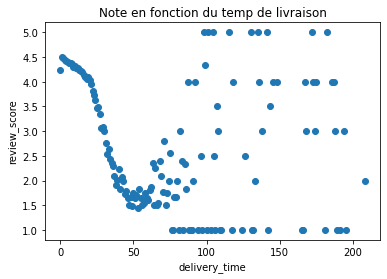

In [8]:
#### Visualisation des données
import matplotlib.pyplot as plt
plt.scatter(
    df_review_by_delivery["delivery_time"], df_review_by_delivery["review_score"]
)
plt.xlabel("delivery_time")
plt.ylabel("review_score")
plt.title("Note en fonction du temp de livraison")
plt.show()

In [9]:
#### On constante qu'au dessus de 50 jours de livraisons, les quantités de livraisons ne sont pas assez significatives pour être représentatives. On va donc se concentrer sur les livraisons de moins de 50 jours.
df_review_by_delivery = df_review_by_delivery[df_review_by_delivery["delivery_time"] <= 50]
df_orders = df_orders[df_orders["delivery_time"] <= 50]

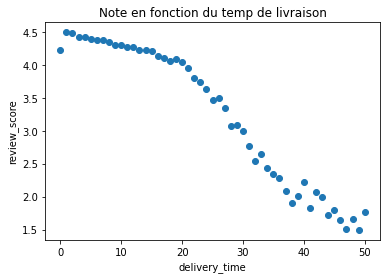

In [10]:
import matplotlib.pyplot as plt

plt.scatter(
    df_review_by_delivery["delivery_time"], df_review_by_delivery["review_score"]
)
plt.xlabel("delivery_time")
plt.ylabel("review_score")
plt.title("Note en fonction du temp de livraison")
plt.show()

On peut donc constater qu'il y a une relation entre la satisfaction d'un produit et le temps de livraison.
Entre 20 jours, l'impact est assez faible mais après 20 jours, la satisfaction baisse de manière importante.

#### Analyse du cout de livraison en fonction du temps de livraison

In [11]:
### Correlation entre le nombres de ventes d'un produit et la fraight_value
df_order_items = olist_order_items[["order_id", "product_id", "price", "freight_value"]]
df_order_items["total_price"] = df_order_items["price"] + df_order_items["freight_value"]
df_order_items = df_order_items.drop(["price", "freight_value"], axis=1)
df_order_items.head()


/tmp/ipykernel_120453/1563362063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order_items["total_price"] = df_order_items["price"] + df_order_items["freight_value"]


,order_id,product_id,total_price
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,72.19
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,259.83
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,216.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,218.04
